In [54]:
import re
import cv2
import PIL
from PIL import Image
from pathlib import Path
import keras
# from keras import ops
# from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import urllib.request
import pytesseract
import xml.etree.ElementTree as ET
from vehicle_license_plate_recognizer import recognizer
from vehicle_license_plate_recognizer import recognizer_enhanced as reco


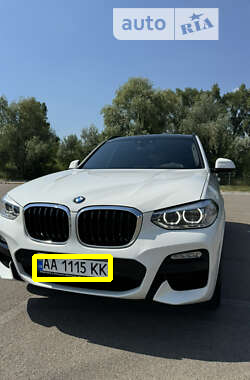

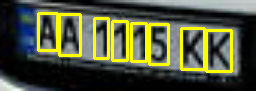

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
11
11
1
1
1
5
21
21
AA1115KK


In [57]:
# test_ds_path = Path("test_dataset/avto_and_number_from_platesmania.com_ua_/avto")

# for file in test_ds_path.iterdir():
#     if file.suffix != ".jpg":
#         continue

model = keras.models.load_model("/home/sims/Projects/mnist_like/mnist_like_v1.keras")

file = Path("/home/sims/Projects/keras_cv_modules/test_dataset/auto_ria/AA1115KK.jpg")
# y_true = re.sub(r"^\d\d | |_", "", file.stem)

image2 = Image.open(file)
img_with_box, plate_orig, y_pred= reco.recognize(image2)
display(img_with_box)
display(plate_orig)

plate, clean_plate, imgs = reco.split_to_chars(plate_orig)
display(plate)
# display(clean_plate)

SYMBOLS = "0123456789-ABCDEFGHIJKLMNOPQRSTUVWXYZ"

class_ids = [symbol for symbol in SYMBOLS]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

# num = pytesseract.image_to_string(clean_plate).upper()

# symbols = "0123456789-ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# num = re.sub(f"[^{symbols}]", "", num)
# print(num)


# "".upper
processed_imgs = []
for img in imgs:
    img = img.convert("L")
    img = PIL.ImageOps.invert(img)
    # print(img.size)
    # size = max(img.size)
    # img_bg = Image.new(mode="L", size=(size, size), color=0)
    # img_bg.paste(img)
    img = img.resize((28,28))
    display(img)
    img = np.array(img)

    processed_imgs.append(img)
    # 
processed_imgs = np.array(processed_imgs)

y_pred = model.predict(processed_imgs)

text = ""
for y in y_pred:
    print(np.array(y).argmax())
    text += class_mapping[np.array(y).argmax()]
print(text)




